In [1]:
import uproot
import awkward as ak
import matplotlib.pyplot as plt
import numpy as np
import h5py
import mplhep as hep

hep.style.use("CMS")

DATA_PATH = "/home/giovanni/pod/thesis/code/scripts-sources/W3Pi-selection-algorithm/data/"

In [2]:
a = np.array([0, 2, 4])
print(np.where(a==5)[0])

[]


In [5]:
with uproot.open(DATA_PATH + "l1Nano_WTo3Pion_PU200.root") as f:
    tree = f.get("Events")
    print(tree.keys())

    branches = tree.arrays()
    genPi_etas = branches["GenPi_eta"].to_numpy()
    genPi_pts = branches["GenPi_pt"].to_numpy()
    Puppi_pdgId = branches["Puppi_pdgId"]
    genPi_idx = branches["Puppi_GenPiIdx"]
    print(genPi_idx[3].tolist())
    

['run', 'luminosityBlock', 'event', 'bunchCrossing', 'orbitNumber', 'nEle', 'Ele_hwEta', 'Ele_hwPhi', 'Ele_hwPt', 'Ele_hwQual', 'Ele_quality', 'Ele_eta', 'Ele_idScore', 'Ele_mass', 'Ele_phi', 'Ele_pt', 'Ele_puppiIsol', 'Ele_puppiIsolPV', 'Ele_trkIsol', 'Ele_trkIsolPV', 'Ele_z0', 'nGenEle', 'GenEle_isFromTau', 'GenEle_isPrompt', 'GenEle_motherId', 'GenEle_dxy', 'GenEle_eta', 'GenEle_mass', 'GenEle_phi', 'GenEle_pt', 'GenEle_z0', 'nGenJet', 'GenJet_eta', 'GenJet_mass', 'GenJet_phi', 'GenJet_pt', 'nGenPho', 'GenPho_isFromTau', 'GenPho_isPrompt', 'GenPho_motherId', 'GenPho_dxy', 'GenPho_eta', 'GenPho_mass', 'GenPho_phi', 'GenPho_pt', 'GenPho_z0', 'nGenPi', 'GenPi_charge', 'GenPi_pdgId', 'GenPi_prompt', 'GenPi_eta', 'GenPi_mass', 'GenPi_phi', 'GenPi_pt', 'GenPi_z0', 'GenVtx_x', 'GenVtx_y', 'GenVtx_z', 'nGenW', 'GenW_charge', 'GenW_pdgId', 'GenW_eta', 'GenW_mass', 'GenW_phi', 'GenW_pt', 'GenW_z0', 'nL1Vtx', 'L1Vtx_sumpt', 'L1Vtx_z', 'nPho', 'Pho_hwEta', 'Pho_hwPhi', 'Pho_hwPt', 'Pho_hwQual',

In [4]:
file = DATA_PATH + "l1Nano_WTo3Pion_PU200.hdf5"

counter = 0

with h5py.File(file, "r") as f:
    for grp_name, grp in f.items():
        if grp.attrs["is_acc"] != 1 or grp.attrs["is_gm"] != 1:
            continue

        counter += 1

print(counter)

10389


In [13]:
file = DATA_PATH + "l1Nano_WTo3Pion_PU200_FixedPoint.hdf5"

counter = 0

with h5py.File(file, "r") as f:
    print(f["0"]["pt"][...])

[ 16  18  15  10   5  11   9  11 181  10   9   9   9   9  13   8   9  22
   9  17  10   9  10  10   9   8  10   8  10   9   8  10]


In [5]:
file = DATA_PATH + "l1Nano_WTo3Pion_PU200.125X_v1.hdf5"

counter = 0

with h5py.File(file, "r") as f:
    for grp_name, grp in f.items():
        if grp.attrs["is_acc"] != 1 or grp.attrs["is_gm"] != 1:
            continue

        counter += 1

print(counter)

8915


In [6]:
file = DATA_PATH + "l1Nano_WTo3Pion_PU200.hdf5"

counter = 0

with h5py.File(file, "r") as f:
    for grp_name, grp in f.items():
        if grp.attrs["is_acc"] != 1:
            continue

        if grp.attrs["is_gm"] != 1:
            counter += 1

print(counter)

10038


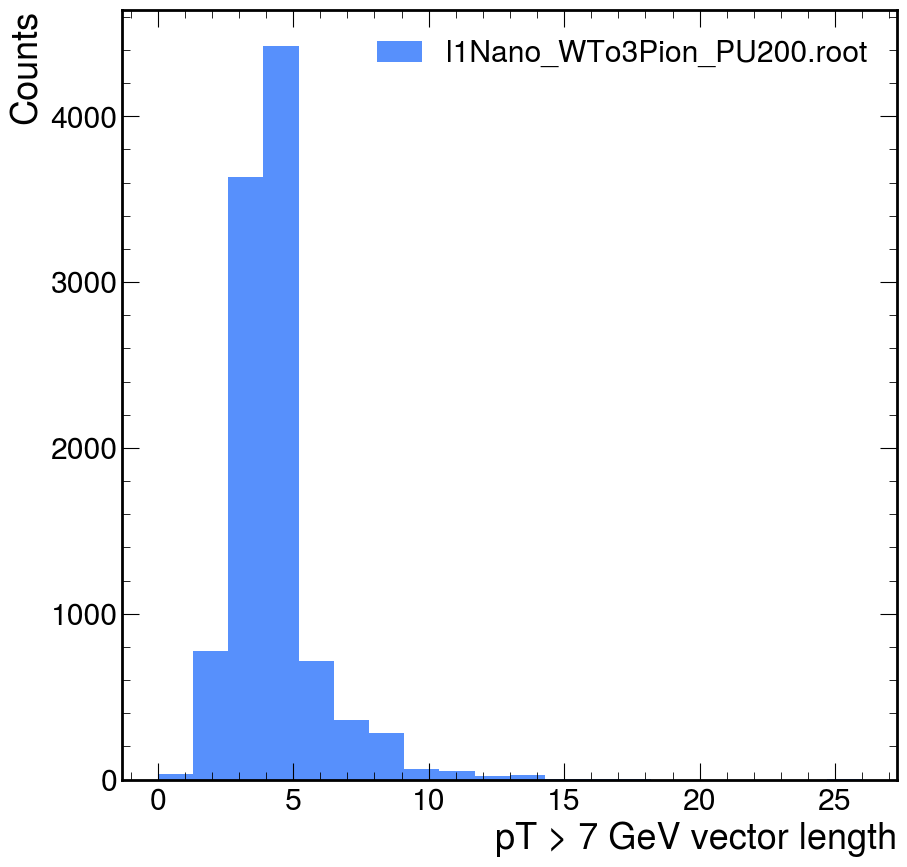

In [13]:
file = DATA_PATH + "l1Nano_WTo3Pion_PU200.hdf5"

histo = []

with h5py.File(file, "r") as f:
    for grp_name, grp in f.items():
        if grp.attrs["is_acc"] != 1 or grp.attrs["is_gm"] != 1:
            continue
        
        pts = grp["pt"][...]
        histo.append(len(pts[pts >= 7]))

plt.hist(histo, bins=20, label="l1Nano_WTo3Pion_PU200.root");
plt.xlabel("pT > 7 GeV vector length");
plt.ylabel("Counts");
plt.legend();

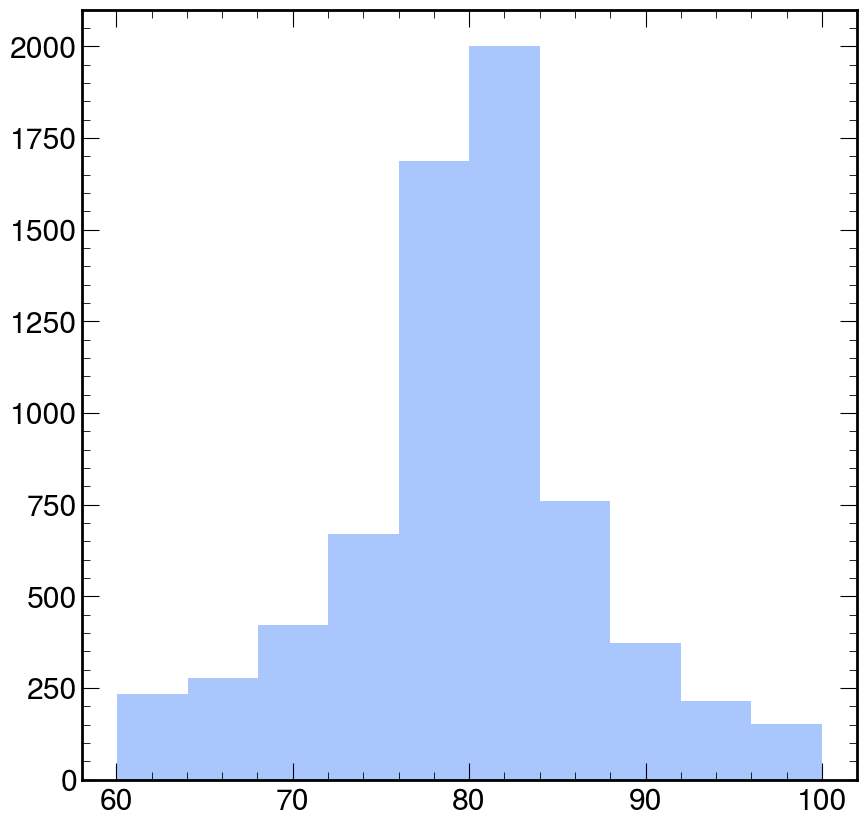

In [7]:
file_reco = DATA_PATH + "l1Nano_WTo3Pion_PU200_reco.hdf5"

reco_mass_array = []

with h5py.File(file_reco, "r") as f_reco:
    for grp_name_reco, grp_reco in f_reco.items():
        reco_w_mass = grp_reco["reco_w_mass"][...]
        
        if reco_w_mass > 0:
            reco_mass_array.append(grp_reco["reco_w_mass"][...])

plt.hist(reco_mass_array, label="l1Nano_\nWTo3Pion_\nPU200.hdf5");

50000
6793


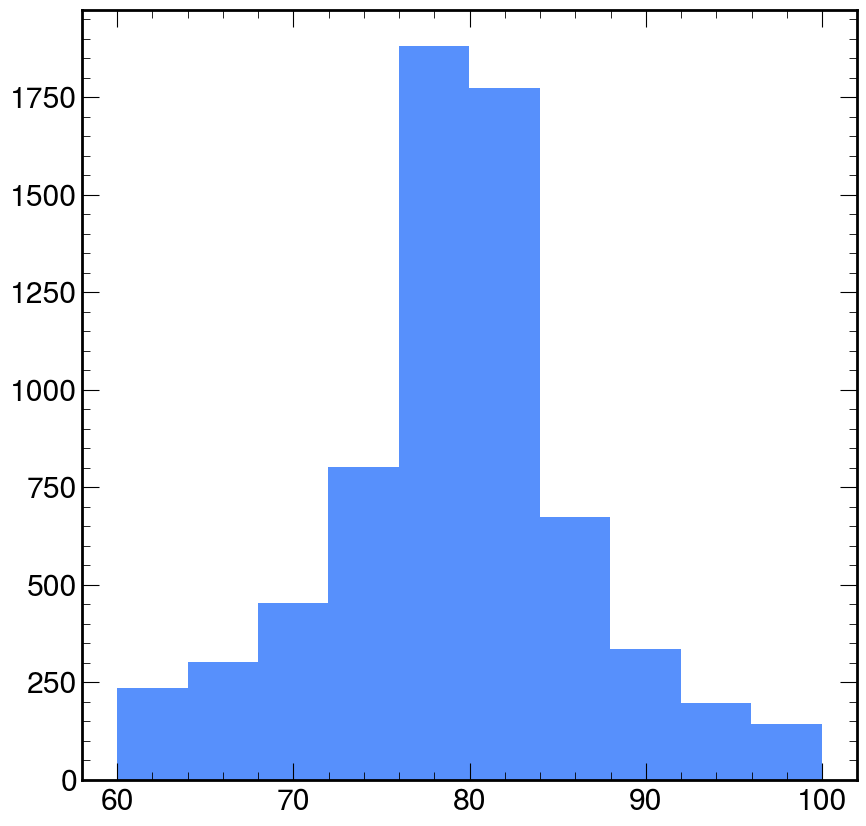

In [4]:
file_reco = DATA_PATH + "l1Nano_WTo3Pion_PU200_funreco.hdf5"

funreco_mass_array = []
funreco_counter = 0

with h5py.File(file_reco, "r") as f_funreco:
    for grp_name_funreco, grp_funreco in f_funreco.items():
        reco_w_mass = grp_funreco["funreco_w_mass"][...]
        funreco_counter += 1
        
        if reco_w_mass > 0:
            funreco_mass_array.append(grp_funreco["funreco_w_mass"][...])

print(funreco_counter)
print(len(funreco_mass_array))
plt.hist(funreco_mass_array, label="l1Nano_\nWTo3Pion_\nPU200.hdf5");

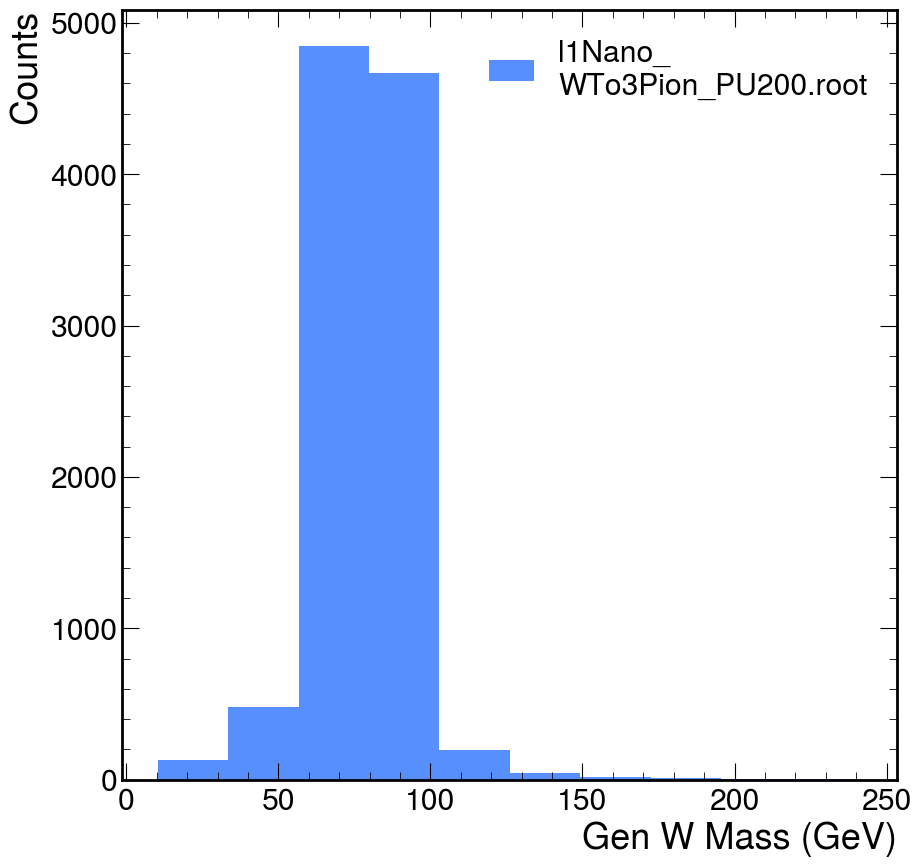

In [12]:
file_gm = DATA_PATH + "l1Nano_WTo3Pion_PU200.hdf5"
mass_array = []

with h5py.File(file_gm, "r") as f_gm:
    for grp_name, grp in f_gm.items():
        if grp.attrs["is_acc"] != 1 or grp.attrs["is_gm"] != 1:
            continue

        mass_array.append(grp["gen_w_mass"][...].item())

plt.hist(mass_array, label = "l1Nano_\nWTo3Pion_PU200.root");
plt.xlabel("Gen W Mass (GeV)")
plt.ylabel("Counts")
plt.legend()

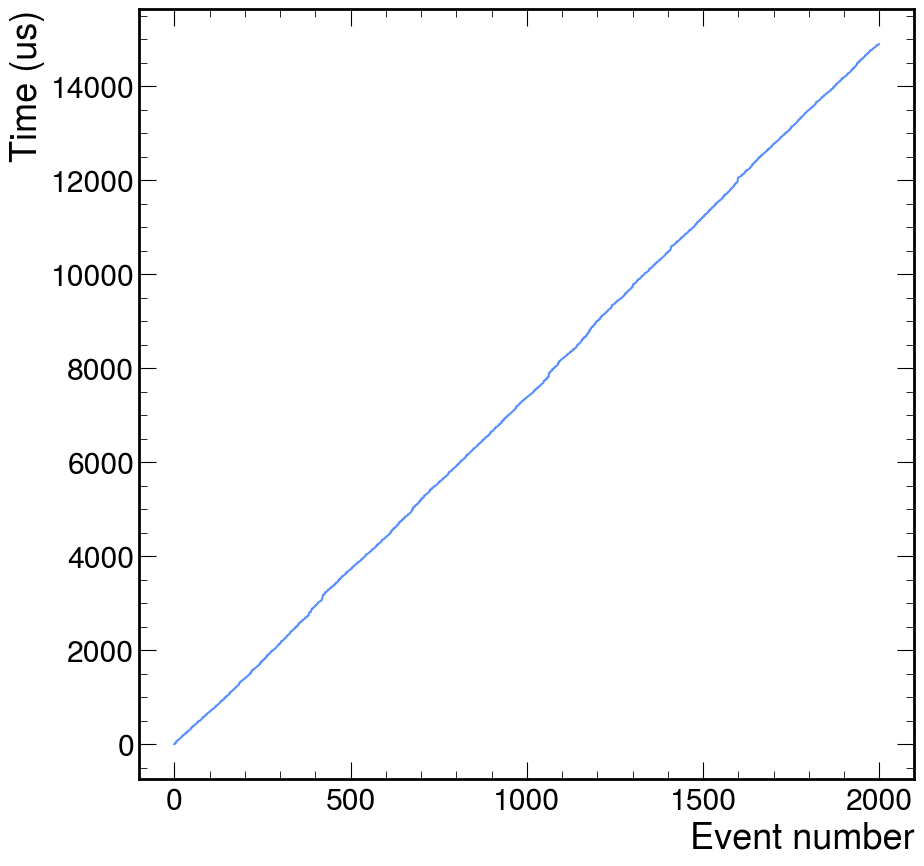

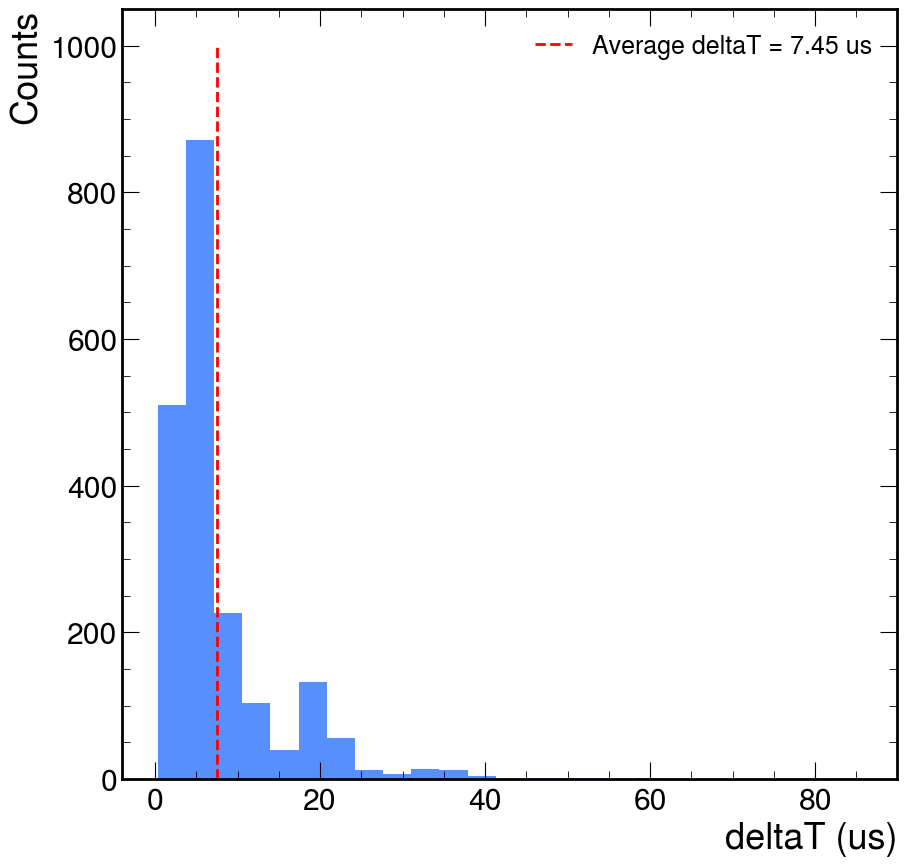

In [10]:
file = DATA_PATH + "l1Nano_WTo3Pion_PU200_aiereco.hdf5"

timestamps = []

with h5py.File(file, "r") as f_aiereco:
    for (grp_name_aiereco, grp_aiereco) in f_aiereco.items():
        timestamps.append(grp_aiereco["aiereco_time"][...])

timestamps_array = np.sort(np.array(timestamps).flatten())

plt.figure()
plt.plot(timestamps_array * 1e-3);
plt.xlabel("Event number");
plt.ylabel("Time (us)");

timestamps_diff_array = np.diff(timestamps_array)
avg_diff = np.mean(timestamps_diff_array)

plt.figure()
plt.hist(timestamps_diff_array * 1e-3, bins=25);
plt.vlines(avg_diff * 1e-3, 0, 1000, colors="red", linewidth=2, linestyles="dashed", label=f"Average deltaT = {avg_diff * 1e-3:.2f} us");
plt.xlabel("deltaT (us)");
plt.ylabel("Counts");
plt.legend(loc="upper right", fontsize=18);

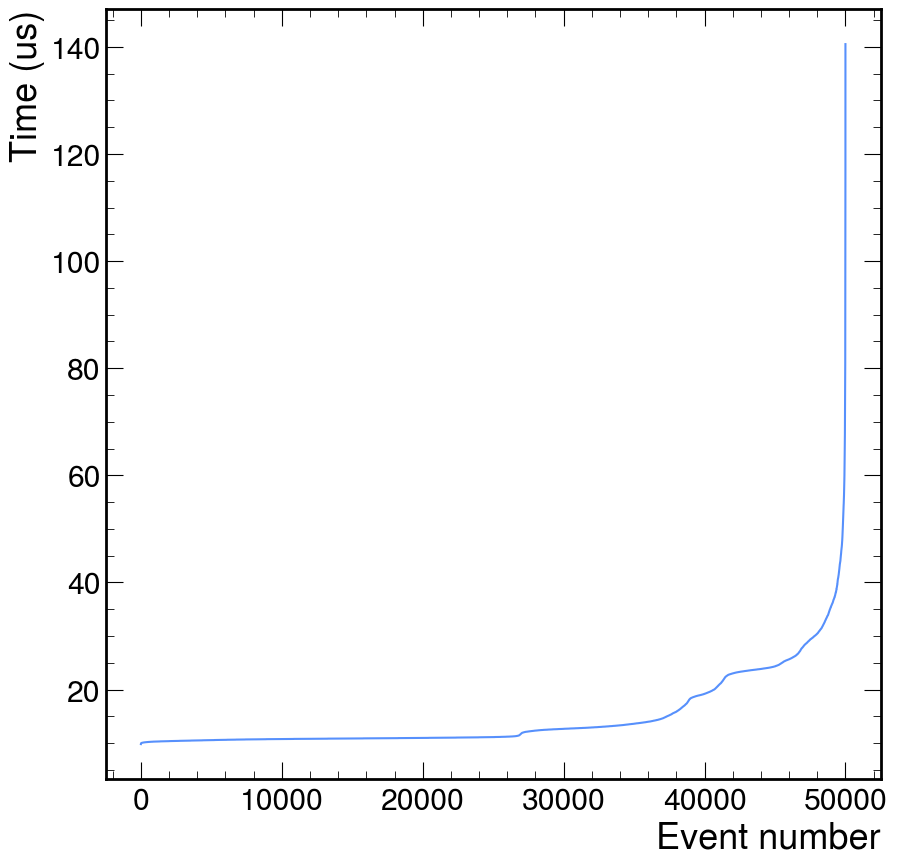

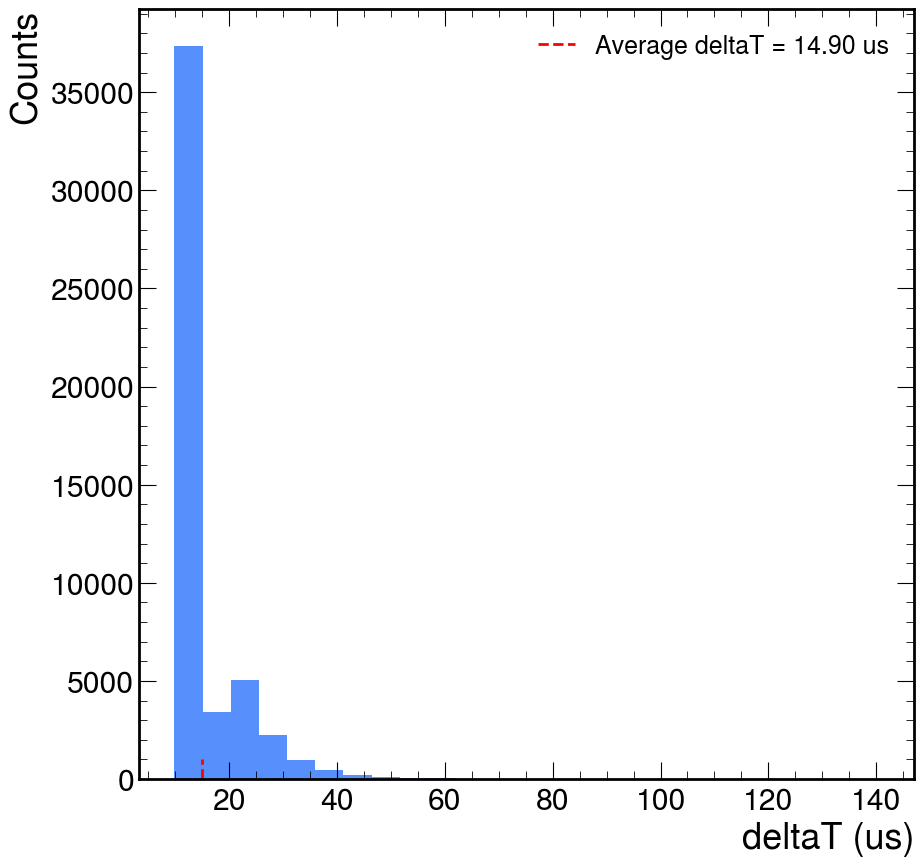

In [2]:
file = DATA_PATH + "l1Nano_WTo3Pion_PU200_cppreco.hdf5"

timestamps = []

with h5py.File(file, "r") as f_aiereco:
    for (grp_name_aiereco, grp_aiereco) in f_aiereco.items():
        timestamps.append(grp_aiereco["cppreco_time"][...])

timestamps_array = np.sort(np.array(timestamps).flatten())

plt.figure()
plt.plot(timestamps_array * 1e-3);
plt.xlabel("Event number");
plt.ylabel("Time (us)");

timestamps_diff_array = timestamps_array
avg_diff = np.mean(timestamps_array)

plt.figure()
plt.hist(timestamps_diff_array * 1e-3, bins=25);
plt.vlines(avg_diff * 1e-3, 0, 1000, colors="red", linewidth=2, linestyles="dashed", label=f"Average deltaT = {avg_diff * 1e-3:.2f} us");
plt.xlabel("deltaT (us)");
plt.ylabel("Counts");
plt.legend(loc="upper right", fontsize=18);

In [22]:
rename_map = {
    "L1Puppi_pt": "Puppi_pt",
    "L1Puppi_eta": "Puppi_eta",
    "L1Puppi_phi": "Puppi_phi",
    "L1Puppi_pdgId": "Puppi_pdgId",
    "L1Puppi_GenPiIdx": "Puppi_GenPiIdx",
    "nL1Puppi": "nPuppi",
}

# Open the original file and TTree
with uproot.open(DATA_PATH + "l1Nano_WTo3Pion_PU200.125X_v0.root") as f_in:
    tree = f_in.get("Events")

    # Convert the TTree to an awkward array
    array = tree.arrays(library="ak")

    # Rename branches
    for old_name, new_name in rename_map.items():
        if old_name in array.fields:
            array[new_name] = array[old_name]  # Add the renamed branch
            del array[old_name]               # Remove the old branch

    # Write the new array to a new ROOT file
    out_tree = {}
    with uproot.recreate(DATA_PATH + "l1Nano_WTo3Pion_PU200.125X_v1.root") as f_out:
        for key in array.fields:
            out_tree[key] = array[key]

        f_out["Events"] = out_tree